In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from sklearn.metrics import confusion_matrix

/Users/hongpo/opt/anaconda3/envs/hongpo/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


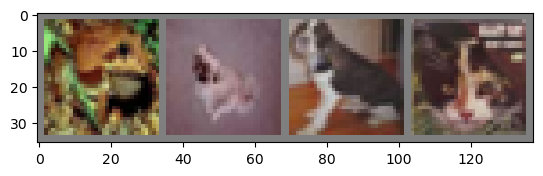

frog  dog   dog   cat  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x


def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()


net = Net()
writer = SummaryWriter()
images, labels = next(iter(trainloader))
grid = torchvision.utils.make_grid(images)
writer.add_image("images", grid)
writer.add_graph(net, images)
writer.close()

/Users/hongpo/opt/anaconda3/envs/hongpo/lib/python3.10/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [5]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [6]:
writer = SummaryWriter()
total = len(trainset)

for epoch in range(5):  # loop over the dataset multiple times

    total_loss = 0
    total_correct = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        total_loss+= loss.item()
        total_correct+= get_num_correct(outputs, labels)

        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    writer.add_scalar("Loss", total_loss, epoch)
    writer.add_scalar("Correct", total_correct, epoch)
    writer.add_scalar("Accuracy", total_correct/total, epoch)

    writer.add_histogram("conv1.bias", net.conv1.bias, epoch)
    writer.add_histogram("conv1.weight", net.conv1.weight, epoch)
    writer.add_histogram("conv2.bias", net.conv2.bias, epoch)
    writer.add_histogram("conv2.weight", net.conv2.weight, epoch)
    print(f'total_loss: {total_loss / 2000:.3f} accuracy: {(total_correct/total)*100:.3f}')
    
writer.close()
print('Finished Training')


[1,  2000] loss: 1.983
[1,  4000] loss: 1.786
[1,  6000] loss: 1.702
[1,  8000] loss: 1.620
[1, 10000] loss: 1.544
[1, 12000] loss: 1.500
total_loss: 10.508 accuracy: 39.582
[2,  2000] loss: 1.441
[2,  4000] loss: 1.439
[2,  6000] loss: 1.419
[2,  8000] loss: 1.388
[2, 10000] loss: 1.383
[2, 12000] loss: 1.380
total_loss: 8.792 accuracy: 49.250
[3,  2000] loss: 1.322
[3,  4000] loss: 1.318
[3,  6000] loss: 1.307
[3,  8000] loss: 1.304
[3, 10000] loss: 1.277
[3, 12000] loss: 1.294
total_loss: 8.142 accuracy: 53.084
[4,  2000] loss: 1.250
[4,  4000] loss: 1.226
[4,  6000] loss: 1.232
[4,  8000] loss: 1.214
[4, 10000] loss: 1.230
[4, 12000] loss: 1.222
total_loss: 7.679 accuracy: 56.090
[5,  2000] loss: 1.172
[5,  4000] loss: 1.194
[5,  6000] loss: 1.173
[5,  8000] loss: 1.151
[5, 10000] loss: 1.171
[5, 12000] loss: 1.172
total_loss: 7.326 accuracy: 58.108
Finished Training


In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

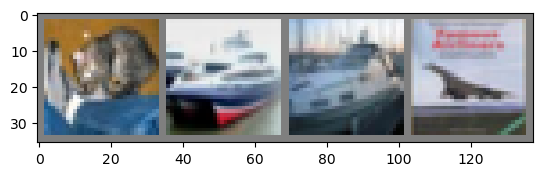

GroundTruth:  cat   ship  ship  plane


In [8]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [9]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [10]:
outputs = net(images)

In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car   ship 


In [12]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 57 %


In [13]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 59.5 %
Accuracy for class: car   is 74.9 %
Accuracy for class: bird  is 50.3 %
Accuracy for class: cat   is 44.7 %
Accuracy for class: deer  is 39.1 %
Accuracy for class: dog   is 41.5 %
Accuracy for class: frog  is 64.3 %
Accuracy for class: horse is 71.0 %
Accuracy for class: ship  is 70.6 %
Accuracy for class: truck is 58.4 %
